In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms


In [2]:
def Addbias(X):
    matrix = X.reshape(X.shape[0], 1)
    ones = np.ones((matrix.shape[0],1))
    concat=np.concatenate((ones,matrix), axis=1)
    return concat 

In [3]:
def Normalize(x):
    x = (x - x.min() ) / (x.max() - x.min())
    return x

In [4]:
def Mse(y,y_hat):
    sub=y-y_hat
    mse_pow=np.power(sub, 2,dtype='float64')
    mse = np.sum(mse_pow)/len(y)
    return mse

In [111]:
df = pd.read_csv('data.csv')
train_x, test_x, train_y, test_y = ms.train_test_split(df['x'], df['y'], train_size=0.7)

In [112]:
train_x=Normalize(np.asanyarray(train_x))
test_x=Normalize(np.asanyarray(test_x))
train_y=np.asanyarray(train_y)
test_y=np.asanyarray(test_y)

In [113]:
x_trnbias = Addbias(train_x)
x_tstbias = Addbias(test_x)

In [8]:
def gradientDescent(x, y):
    alpha=0.01
    m,n=x.shape
    theta = np.random.rand(n).reshape(n, 1)
    errors=[]
    i=0
    for i in range(10000): 
        x1=x[:,[1]]
        y_hat = theta[1]*x1 +theta[0]
        a=(y_hat-y.reshape(y.shape[0],1))
        error= cost(m,a)
        errors.append(error) 
        #a=(y_hat-y.reshape(y.shape[0],1))
        gra_theta1= np.sum(x1*a)/m
        gra_theta0 = np.sum(a)/m 
        theta[1] = theta[1] - alpha* gra_theta1
        theta[0] = theta[0] - alpha*gra_theta0
       
    errors = np.array(errors)    
    return theta,errors

In [9]:
def cost(m,a):
    p=np.power(a,2,dtype='float64')
    err = np.sum(p)/(2*m)
    return err

In [116]:
theta,errors = gradientDescent( x_trnbias,train_y)

In [117]:
y_hat_Train =theta[0] + theta[1]*train_x
y_hat_Test = theta[0] +theta[1]*test_x

In [118]:
# Print Theta
print('theta0: ',theta[0])
print('theta1: ',theta[1])

theta0:  [79.73857454]
theta1:  [-49.54207482]


In [141]:
mseTrain = Mse(train_y,y_hat_Train)
mseTest = Mse(test_y,y_hat_Test)
print('MSE Train : ', mseTrain)
print('MSE Test : ', mseTest)

MSE Train :  16.028842593548845
MSE Test :  16.32632733058033


In [142]:
print('decision boundary formula:')
print( 'y ='+str(theta[0]) + ' + ' + str(theta[1]) + '*x1')

decision boundary formula:
y =[79.73857454] + [-49.54207482]*x1


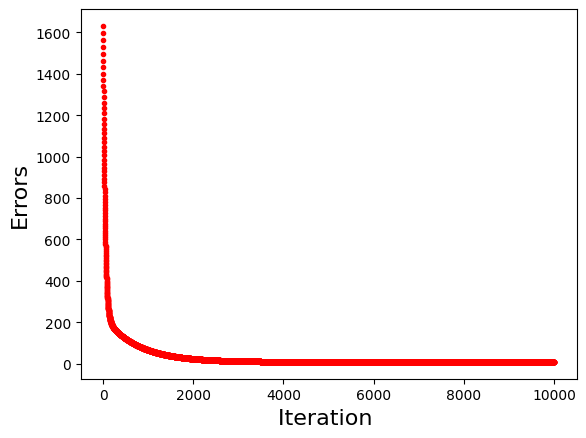

In [120]:
#plot cost
plt.plot(errors, 'r.', linewidth=3.0)
plt.xlabel('Iteration ', fontsize=16)
plt.ylabel('Errors', fontsize=16)
plt.show()

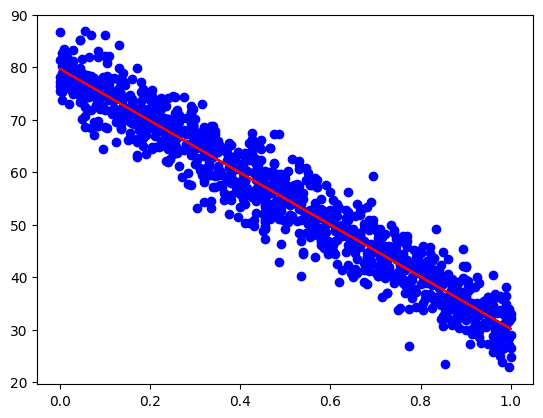

In [121]:
plt.scatter(train_x,train_y, color='blue')
plt.plot(train_x,y_hat_Train, color='red')

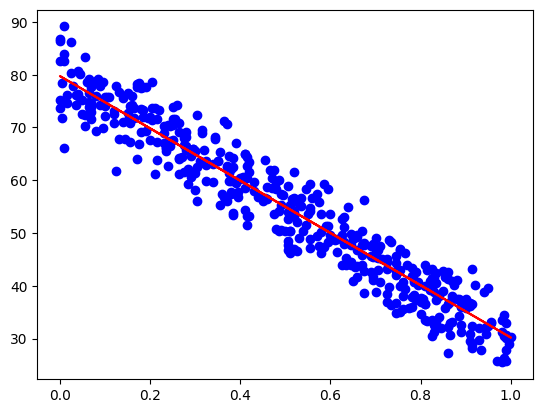

In [122]:
plt.scatter(test_x,test_y, color='blue')
plt.plot(test_x,y_hat_Test, color='red')

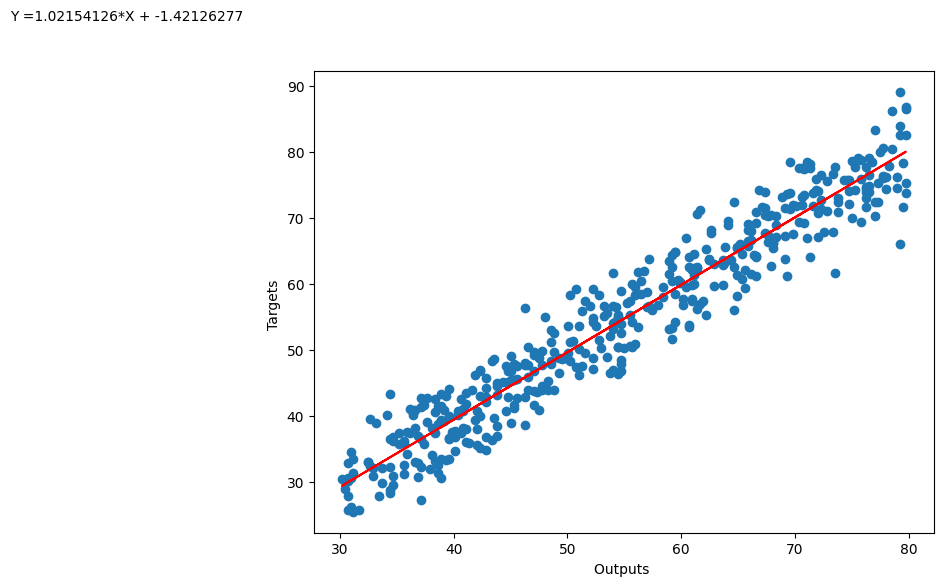

In [135]:
theta1, theta0 = np.polyfit(y_hat_Test,test_y, 1)
plt.figure(figsize=[8, 6])
plt.scatter(y_hat_Test,test_y)
plt.plot(y_hat_Test, theta1*y_hat_Test+theta0,color='r')
plt.text(1,100, 'Y =' + np.array2string(theta1) + '*X + ' + np.array2string(theta0))
plt.xlabel('Outputs ')
plt.ylabel('Targets ')
plt.show()